In [270]:
import requests
import pandas as pd
import json
import pprint
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
#'get' function returns a response object
response = requests.get('https://api.nasa.gov/neo/rest/v1/neo/3542519?api_key=6Vfn5XgF2GfENKhGyta7aTPyQsfgDp45ppLDfWzw')

    #response.content used to access data in raw bytes format.
    #response.text: used to access data in String format.
    #response.json() used to access data in the JSON serialized format.

data_json = response.json()
#Use pretty printer library to see nested data
pprint.pprint(data_json)

{'absolute_magnitude_h': 21.8,
 'close_approach_data': [{'close_approach_date': '1900-06-01',
                          'close_approach_date_full': '1900-Jun-01 16:40',
                          'epoch_date_close_approach': -2195882400000,
                          'miss_distance': {'astronomical': '0.0445449038',
                                            'kilometers': '6663822.727834906',
                                            'lunar': '17.3279675782',
                                            'miles': '4140707.4359214628'},
                          'orbiting_body': 'Merc',
                          'relative_velocity': {'kilometers_per_hour': '111371.1395207566',
                                                'kilometers_per_second': '30.9364276447',
                                                'miles_per_hour': '69201.6949983279'}},
                         {'close_approach_date': '1900-07-07',
                          'close_approach_date_full': '1900-Jul-07 22:08',


                         {'close_approach_date': '1969-08-26',
                          'close_approach_date_full': '1969-Aug-26 14:37',
                          'epoch_date_close_approach': -11006580000,
                          'miss_distance': {'astronomical': '0.3781107643',
                                            'kilometers': '56564564.963352041',
                                            'lunar': '147.0850873127',
                                            'miles': '35147590.8527825258'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '101332.6517424265',
                                                'kilometers_per_second': '28.1479588173',
                                                'miles_per_hour': '62964.1690785094'}},
                         {'close_approach_date': '1970-05-21',
                          'close_approach_date_full': '1970-May-21 00:03',
                          'ep

                                            'miles': '6215177.2741541966'},
                          'orbiting_body': 'Merc',
                          'relative_velocity': {'kilometers_per_hour': '105100.9540736195',
                                                'kilometers_per_second': '29.1947094649',
                                                'miles_per_hour': '65305.6456020221'}},
                         {'close_approach_date': '2018-04-22',
                          'close_approach_date_full': '2018-Apr-22 13:15',
                          'epoch_date_close_approach': 1524402900000,
                          'miss_distance': {'astronomical': '0.0632976176',
                                            'kilometers': '9469188.769034512',
                                            'lunar': '24.6227732464',
                                            'miles': '5883881.0618877856'},
                          'orbiting_body': 'Merc',
                          'relative_velocit

                                            'miles': '5411244.2545126712'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '55686.8963562228',
                                                'kilometers_per_second': '15.4685823212',
                                                'miles_per_hour': '34601.6717942319'}},
                         {'close_approach_date': '2082-06-27',
                          'close_approach_date_full': '2082-Jun-27 15:28',
                          'epoch_date_close_approach': 3549799680000,
                          'miss_distance': {'astronomical': '0.0936614026',
                                            'kilometers': '14011546.330172462',
                                            'lunar': '36.4342856114',
                                            'miles': '8706371.1697734956'},
                          'orbiting_body': 'Merc',
                          'relative_veloci

                                                'kilometers_per_second': '29.775520798',
                                                'miles_per_hour': '66604.8624729395'}},
                         {'close_approach_date': '2129-05-04',
                          'close_approach_date_full': '2129-May-04 19:12',
                          'epoch_date_close_approach': 5028289920000,
                          'miss_distance': {'astronomical': '0.0666677117',
                                            'kilometers': '9973347.668094079',
                                            'lunar': '25.9337398513',
                                            'miles': '6197150.8752491302'},
                          'orbiting_body': 'Merc',
                          'relative_velocity': {'kilometers_per_hour': '123950.6406892145',
                                                'kilometers_per_second': '34.4307335248',
                                                'miles_per_hour': '77018.10782158

                                            'kilometers': '8793029.524465214',
                                            'lunar': '22.8645533858',
                                            'miles': '5463735.1897353932'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '66970.2528525967',
                                                'kilometers_per_second': '18.6028480146',
                                                'miles_per_hour': '41612.7107238816'}},
                         {'close_approach_date': '2184-01-07',
                          'close_approach_date_full': '2184-Jan-07 12:34',
                          'epoch_date_close_approach': 6753760440000,
                          'miss_distance': {'astronomical': '0.0944996643',
                                            'kilometers': '14136948.494995041',
                                            'lunar': '36.7603694127',
                    

In [272]:
type(response)
#Is a response object from 'get' command

requests.models.Response

In [273]:
#Indicates if the request has been successful
response.status_code

200

In [274]:
#Parse data to split the nested dictionaries and lists on close_approach_data
nasa_split=pd.json_normalize(data_json, 'close_approach_data', ['id', 'absolute_magnitude_h', 'designation', 'is_potentially_hazardous_asteroid', 'is_sentry_object', 'name', 'nasa_jpl_url', 'neo_reference_id'])
nasa_split.head(50)

,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles,id,absolute_magnitude_h,designation,is_potentially_hazardous_asteroid,is_sentry_object,name,nasa_jpl_url,neo_reference_id
0,1900-06-01,1900-Jun-01 16:40,-2195882400000,Merc,30.9364276447,111371.1395207566,69201.6949983279,0.0445449038,17.3279675782,6663822.727834906,4140707.4359214628,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
1,1900-07-07,1900-Jul-07 22:08,-2192752320000,Venus,31.778176987,114401.4371533224,71084.6041022964,0.141663635,55.107154015,21192578.05245745,13168457.37231481,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
2,1900-07-27,1900-Jul-27 20:47,-2191029180000,Earth,23.8645397789,85912.3432039871,53382.5890313885,0.2177284178,84.6963545242,32571707.541350086,20239120.5657037468,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
3,1902-02-11,1902-Feb-11 06:38,-2142350520000,Merc,28.1654537618,101395.6335424872,63003.3035197749,0.0869552586,33.8255955954,13008321.471859182,8082996.1491014316,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
4,1903-09-02,1903-Sep-02 16:25,-2093240100000,Earth,20.7059092934,74541.2734561554,46317.0484983539,0.1920508409,74.7077771101,28730396.730348883,17852240.7088372654,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
5,1904-07-26,1904-Jul-26 08:05,-2064930900000,Earth,15.8484630933,57054.4671357367,35451.4270933137,0.0426652322,16.5967753258,6382627.860175414,3965981.0473281532,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
6,1907-04-13,1907-Apr-13 18:18,-1979271720000,Venus,30.3953753271,109423.3511774164,67991.4150691007,0.116964649,45.499248461,17497662.35569763,10872543.221302094,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
7,1907-08-23,1907-Aug-23 15:07,-1967878380000,Earth,30.7220904798,110599.5257272048,68722.2441942179,0.44418035,172.78615615,66448434.2558545,41289142.4436121,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
8,1908-08-17,1908-Aug-17 14:30,-1936776600000,Earth,14.3282617681,51581.7423651722,32050.8887490705,0.1463952258,56.9477428362,21900413.957849046,13608286.2087909948,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
9,1909-07-31,1909-Jul-31 06:55,-1906736700000,Earth,26.8654526863,96715.6296706847,60095.3311139874,0.3030554191,117.8885580299,45336445.189317317,28170760.7451082946,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519


In [275]:
nasa_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   close_approach_date                      282 non-null    object
 1   close_approach_date_full                 282 non-null    object
 2   epoch_date_close_approach                282 non-null    int64 
 3   orbiting_body                            282 non-null    object
 4   relative_velocity.kilometers_per_second  282 non-null    object
 5   relative_velocity.kilometers_per_hour    282 non-null    object
 6   relative_velocity.miles_per_hour         282 non-null    object
 7   miss_distance.astronomical               282 non-null    object
 8   miss_distance.lunar                      282 non-null    object
 9   miss_distance.kilometers                 282 non-null    object
 10  miss_distance.miles                      282 non-null    objec

In [276]:
nasa_split.dtypes

close_approach_date                        object
close_approach_date_full                   object
epoch_date_close_approach                   int64
orbiting_body                              object
relative_velocity.kilometers_per_second    object
relative_velocity.kilometers_per_hour      object
relative_velocity.miles_per_hour           object
miss_distance.astronomical                 object
miss_distance.lunar                        object
miss_distance.kilometers                   object
miss_distance.miles                        object
id                                         object
absolute_magnitude_h                       object
designation                                object
is_potentially_hazardous_asteroid          object
is_sentry_object                           object
name                                       object
nasa_jpl_url                               object
neo_reference_id                           object
dtype: object

### Cleaning
    close_approach_date to be removed
    close_approach_date_full to datetime
    relative_velocities to float
    miss_distances to float
    absolute_magnitude-remove
    designation-remove
    nasa_jpl_url-remove but reference
    neo_reference_id-remove


In [277]:
for i, v in enumerate(nasa_split.columns):
    print(i,v)    

0 close_approach_date
1 close_approach_date_full
2 epoch_date_close_approach
3 orbiting_body
4 relative_velocity.kilometers_per_second
5 relative_velocity.kilometers_per_hour
6 relative_velocity.miles_per_hour
7 miss_distance.astronomical
8 miss_distance.lunar
9 miss_distance.kilometers
10 miss_distance.miles
11 id
12 absolute_magnitude_h
13 designation
14 is_potentially_hazardous_asteroid
15 is_sentry_object
16 name
17 nasa_jpl_url
18 neo_reference_id


In [278]:
#Remove unnecessary data
nasa_df=nasa_split.drop(nasa_split.columns[[0, 2, 4, 6, 9,10, 12, 13, 15, 17, 18]], axis=1)
nasa_df

,close_approach_date_full,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,id,is_potentially_hazardous_asteroid,name
0,1900-Jun-01 16:40,Merc,111371.1395207566,0.0445449038,17.3279675782,3542519,True,(2010 PK9)
1,1900-Jul-07 22:08,Venus,114401.4371533224,0.141663635,55.107154015,3542519,True,(2010 PK9)
2,1900-Jul-27 20:47,Earth,85912.3432039871,0.2177284178,84.6963545242,3542519,True,(2010 PK9)
3,1902-Feb-11 06:38,Merc,101395.6335424872,0.0869552586,33.8255955954,3542519,True,(2010 PK9)
4,1903-Sep-02 16:25,Earth,74541.2734561554,0.1920508409,74.7077771101,3542519,True,(2010 PK9)
...,...,...,...,...,...,...,...,...
277,2192-Jul-28 09:17,Earth,77335.249652878,0.1470282053,57.1939718617,3542519,True,(2010 PK9)
278,2195-Sep-03 14:04,Earth,83061.922460927,0.2514726953,97.8228784717,3542519,True,(2010 PK9)
279,2196-Aug-01 09:17,Earth,53670.6566021448,0.0876420921,34.0927738269,3542519,True,(2010 PK9)
280,2197-Jan-12 08:34,Venus,86498.6140359086,0.0627001498,24.3903582722,3542519,True,(2010 PK9)


### Cleaning    
    close_approach_date_full to datetime
    miss_distances to float
    relative_velocities to float
    nasa_jpl_url-reference

In [279]:
for i, v in enumerate(nasa_df.columns):
    print(i,v)  

0 close_approach_date_full
1 orbiting_body
2 relative_velocity.kilometers_per_hour
3 miss_distance.astronomical
4 miss_distance.lunar
5 id
6 is_potentially_hazardous_asteroid
7 name


In [280]:
#Change 'close_approach_data_full' from object to datetime
nasa_df['close_approach_date_full']=pd.to_datetime(nasa_df['close_approach_date_full'])
nasa_df.dtypes

close_approach_date_full                 datetime64[ns]
orbiting_body                                    object
relative_velocity.kilometers_per_hour            object
miss_distance.astronomical                       object
miss_distance.lunar                              object
id                                               object
is_potentially_hazardous_asteroid                object
name                                             object
dtype: object

In [281]:
#Change velocities and distances to floats
nasa_df[nasa_df.columns[2:5]] = nasa_df[nasa_df.columns[2:5]].astype(float)
nasa_df.dtypes

close_approach_date_full                 datetime64[ns]
orbiting_body                                    object
relative_velocity.kilometers_per_hour           float64
miss_distance.astronomical                      float64
miss_distance.lunar                             float64
id                                               object
is_potentially_hazardous_asteroid                object
name                                             object
dtype: object

In [282]:
nasa_df

,close_approach_date_full,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,id,is_potentially_hazardous_asteroid,name
0,1900-06-01 16:40:00,Merc,111371.139521,0.044545,17.327968,3542519,True,(2010 PK9)
1,1900-07-07 22:08:00,Venus,114401.437153,0.141664,55.107154,3542519,True,(2010 PK9)
2,1900-07-27 20:47:00,Earth,85912.343204,0.217728,84.696355,3542519,True,(2010 PK9)
3,1902-02-11 06:38:00,Merc,101395.633542,0.086955,33.825596,3542519,True,(2010 PK9)
4,1903-09-02 16:25:00,Earth,74541.273456,0.192051,74.707777,3542519,True,(2010 PK9)
...,...,...,...,...,...,...,...,...
277,2192-07-28 09:17:00,Earth,77335.249653,0.147028,57.193972,3542519,True,(2010 PK9)
278,2195-09-03 14:04:00,Earth,83061.922461,0.251473,97.822878,3542519,True,(2010 PK9)
279,2196-08-01 09:17:00,Earth,53670.656602,0.087642,34.092774,3542519,True,(2010 PK9)
280,2197-01-12 08:34:00,Venus,86498.614036,0.062700,24.390358,3542519,True,(2010 PK9)


C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

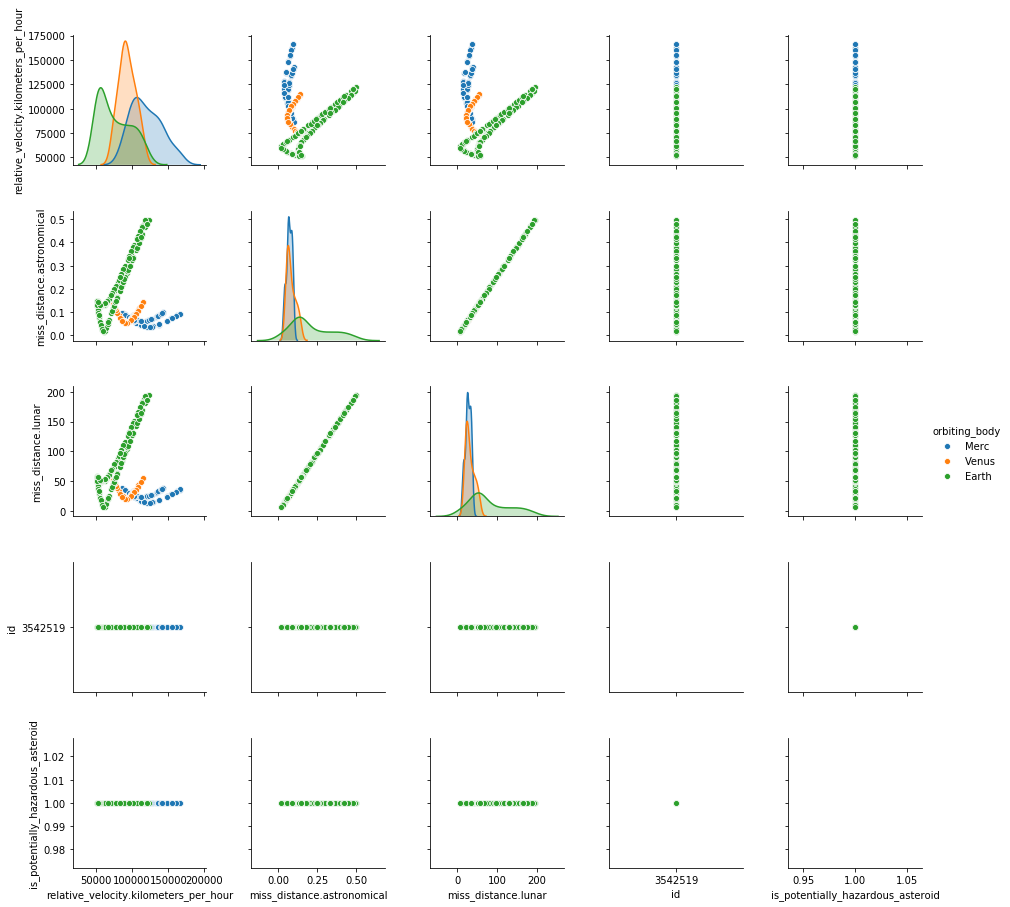

In [283]:
sns.pairplot(nasa_df, hue='orbiting_body');

In [284]:
#Create variables for the following visuals
twentieth_cent = nasa_df[(nasa_df['close_approach_date_full'] >= '1900-1-1') & (nasa_df['close_approach_date_full'] <= '1999-12-31')]
twenty_first_cent = nasa_df[(nasa_df['close_approach_date_full'] >= '2000-1-1') & (nasa_df['close_approach_date_full'] <= '2099-12-31')]
twenty_second_cent = nasa_df[(nasa_df['close_approach_date_full'] >= '2100-1-1') & (nasa_df['close_approach_date_full'] <= '2199-12-31')]

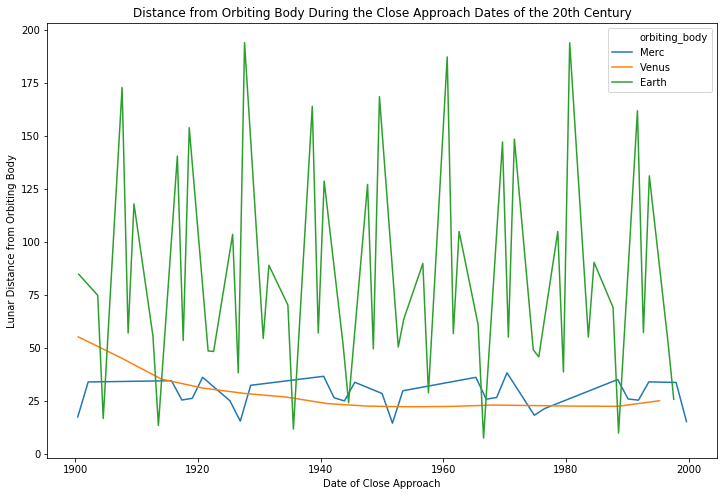

In [292]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twentieth_cent, x='close_approach_date_full', y='miss_distance.lunar', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.title('Distance from Orbiting Body During the Close Approach Dates of the 20th Century')
plt.xlabel('Date of Close Approach')
plt.ylabel('Lunar Distance from Orbiting Body');

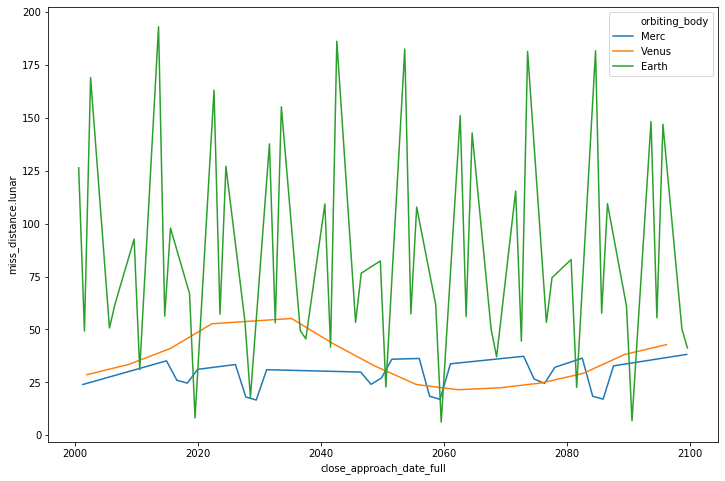

In [286]:
plt.figure(figsize=(12,8))
sns.lineplot(data=twenty_first_cent, x='close_approach_date_full', y='miss_distance.lunar', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth']);

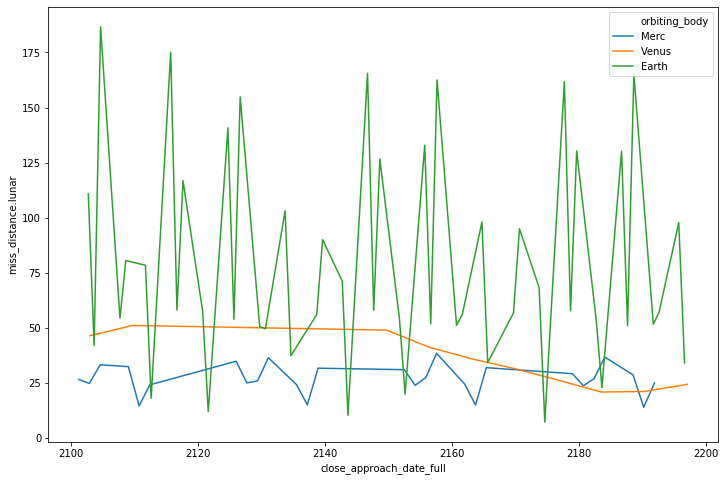

In [287]:
plt.figure(figsize=(12,8))
sns.lineplot(data=twenty_second_cent, x='close_approach_date_full', y='miss_distance.lunar', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.legend(loc='upper right');

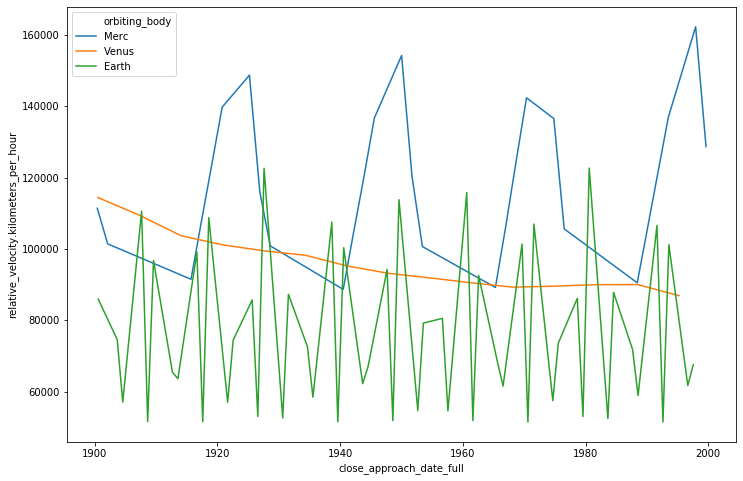

In [288]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twentieth_cent, x='close_approach_date_full', y='relative_velocity.kilometers_per_hour', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth']);

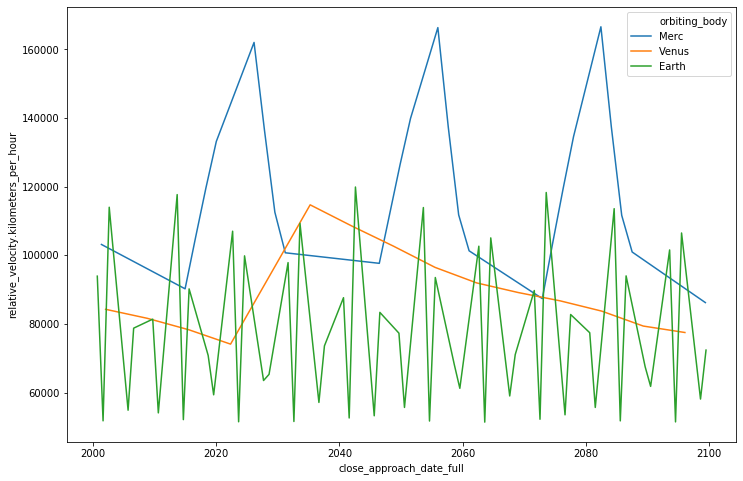

In [289]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twenty_first_cent, x='close_approach_date_full', y='relative_velocity.kilometers_per_hour', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth']);

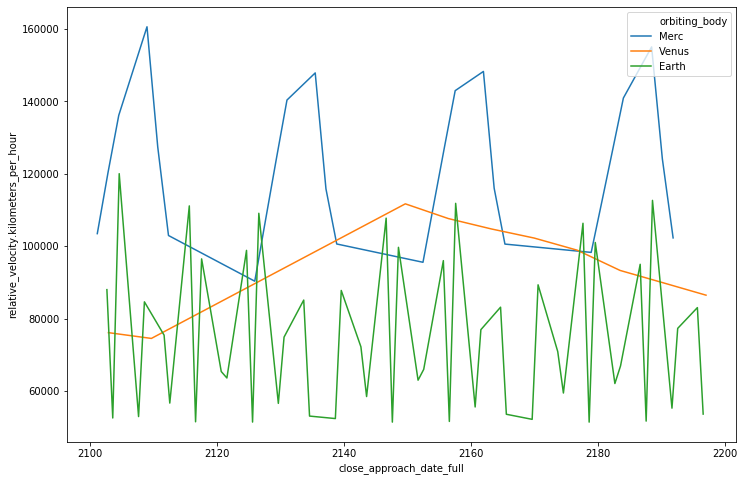

In [290]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twenty_second_cent, x='close_approach_date_full', y='relative_velocity.kilometers_per_hour', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.legend(loc='upper right');